# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = "train.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
import numpy as np
### Replace each question mark with the appropriate value.
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


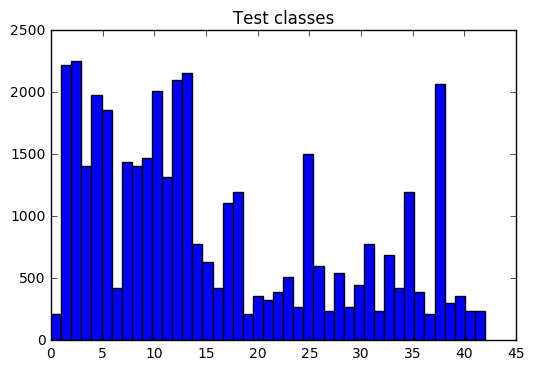

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Display histogram of classes
plt.hist(y_train, n_classes)
plt.title('Test classes')
plt.show()

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

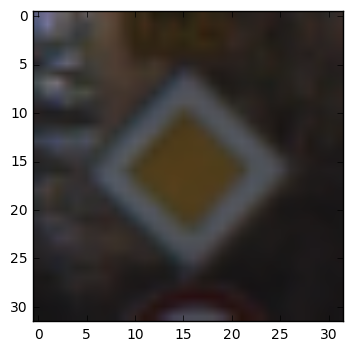

In [4]:
### Data exploration visualization goes here.
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

image_index = random.randint(0, len(X_train))
image = X_train[image_index]
plt.imshow(image)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Split the data into training/validation/testing sets here.
# I split the dataset into training and validation before
# the preprocessing stage.
# I do this because I want the validation set not to be so
# similar to the training test.

#Shuffle data and split dataset into train and validation
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

X_train, y_train = shuffle(X_train, y_train)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, random_state=50)

n_train = len(X_train)

n_val = len(X_validation)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_val)

Number of training examples = 27446
Number of validation examples = 11763


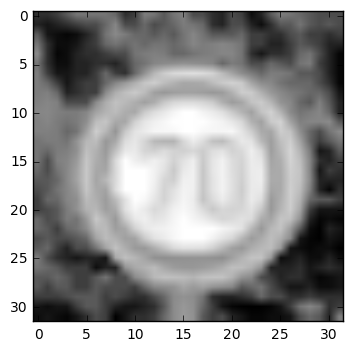

In [6]:
### Preprocess the data here.
import cv2

def preprocess_image(x):

    # convert to grayscale
    gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    
    # increase contrast
    contrast = cv2.equalizeHist(gray)
    
    # make dimensions 32x32x1, not 32x32
    contrast = np.expand_dims(contrast, axis=2)
    
    return contrast

p_images = []
for img in X_train:
    new_img = preprocess_image(img)
    p_images.append(new_img)
    
X_train = np.array(p_images)

image_index = random.randint(0, len(X_train))
image = X_train[image_index]
image = np.squeeze(image)
plt.imshow(image, cmap="gray")
plt.show()


In [7]:
# Convert to grayscale the validation and testing sets
# so the images in these groups have the same
# dimensions as the ones in the training set
def gray_image(x):

    # convert to grayscale
    gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
      
    # make dimensions 32x32x1, not 32x32
    gray = np.expand_dims(gray, axis=2)
    
    return gray

p_images = []
for img in X_validation:
    new_img = preprocess_image(img)
    p_images.append(new_img)
    
X_validation = np.array(p_images)

p_images = []
for img in X_test:
    new_img = preprocess_image(img)
    p_images.append(new_img)
    
X_test = np.array(p_images)

n_val = len(X_validation)
n_test = len(X_test)

print("Number of validation examples =", n_val)
print("Number of testing examples =", n_test)

n_classes_validation = len(np.unique(y_validation))
n_classes_test = len(np.unique(y_test))
print("Number of classes in validation set =", n_classes_validation)
print("Number of classes in testing set =", n_classes_test)


Number of validation examples = 11763
Number of testing examples = 12630
Number of classes in validation set = 43
Number of classes in testing set = 43


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I decided to make two modifications in the image: converting to grayscale, and increasing contrast

The first modification is done based on my personal assumption that the information provided by the traffic signs does not really depend on the colors but in the intensity and contrast of the different parts of the sign. This is a strong  assumption that may bias the final model highly. The great results obtained by [Pierre Sermanet and Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) in their work using grayscale images was an additional motivation to use this modification.

As mentioned above, my assumption of the intensity and contrast being the most important features of traffic signs, led me to increase the contrast of the images to highlight those features. For instance, several traffic signs have a white background, so increasing the contrast helps to separate the useful information from the rest.

In [8]:
### Generate data additional data (OPTIONAL!)
def blur_image(x):
    x = np.squeeze(x)
    x = cv2.GaussianBlur(x, (3, 3), 0)
    x = np.expand_dims(x, axis=2)
    return x

def translate_image(x):
    x = np.squeeze(x)
    delta = random.randrange(1, 3) # 1 or 2 pixels
    rows, cols = x.shape
    M = np.float32([[1, 0, delta], [0, 1, delta]])
    t = cv2.warpAffine(x, M, (cols, rows))
    t = np.expand_dims(t, axis=2)
    
    return t

def rotate_image(x):
    x = np.squeeze(x)
    delta = random.randrange(1, 16) # between 0 - 15 degrees
    rows, cols = x.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),delta,1)
    r = cv2.warpAffine(x, M, (cols, rows))
    r = np.expand_dims(r, axis=2)
    
    return r

X_big, X_small, y_big, y_small = train_test_split(X_train, y_train, test_size=0.8, random_state=50)

#Add 50% of transformed images
for i in range(1):
    extra_data = []
    for img in X_small:
        ran = random.randrange(1, 4) # 1, 2, 3
        new_image = None
        if ran == 1:
            new_image = blur_image(translate_image(img))
        elif ran == 2:
            new_image = rotate_image(blur_image(img))
        elif ran == 3:
            new_image = rotate_image(translate_image(img))

        extra_data.append(new_image)
    
    X_train = np.append(X_train, np.array(extra_data), axis=0)
    y_train = np.append(y_train, y_small, axis=0)

# same number of inputs and outpus
assert len(X_train) == len(y_train)

n_train = len(X_train)
print("Number of training examples =", n_train)
print("Input shape =", X_train.shape)

Number of training examples = 49403
Input shape = (49403, 32, 32, 1)


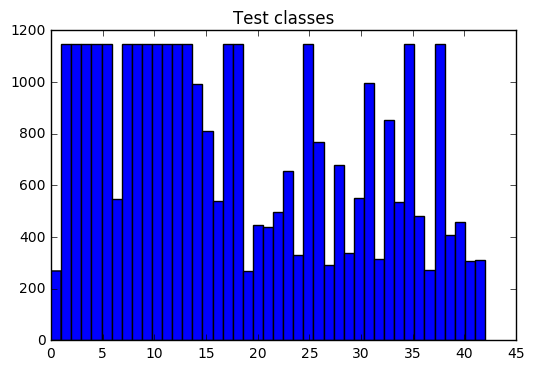

Number of training examples = 32895
Input shape = (32895, 32, 32, 1)


In [9]:
# Balance the data
n_elem_class_train = np.bincount(y_train) # number of elements per class in training set
avg_elem_class_train = round(np.average(n_elem_class_train))

# Remove elements from classes with more elements than the average
elements_to_remove_per_class = []
for n_elem in n_elem_class_train:
    if n_elem > avg_elem_class_train:
        elements_to_remove_per_class.append(n_elem - avg_elem_class_train)
    else:
        elements_to_remove_per_class.append(0)

indices_elements_to_remove = []
index = 0
for clazz in y_train:
    if elements_to_remove_per_class[clazz] > 0:
        indices_elements_to_remove.append(index)
        elements_to_remove_per_class[clazz] -= 1
    index += 1

y_train = np.delete(y_train, indices_elements_to_remove)
X_train = np.delete(X_train, indices_elements_to_remove, axis=0)

# Display histogram of classes
plt.hist(y_train, n_classes)
plt.title('Train classes')
plt.show()

n_train = len(X_train)
print("Number of training examples =", n_train)
print("Input shape =", X_train.shape)

In [10]:
# Normalize RGB values
def normalize(x):
    x = x.astype(float)
    max_i = 255
    min_i = 0
    max_o = 1
    min_o = 0

    return ((x - min_i) * (max_o - min_o) / (max_i - min_i)) + min_o

def normalize_set(setImages):
    
    normalized_images = []
    for img in setImages:
        normalized_images.append(normalize(img))

    return np.array(normalized_images)

X_train = normalize_set(X_train)
X_test = normalize_set(X_test)
X_validation = normalize_set(X_validation)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The test set was already defined by the data provided, so I decided to keep it that way.

Then, I generated new images out of the training set. These new images are variations of their original counterparts. I used three type of modifications: blur, translation, and rotation. I took 70% of the training set and applied the mentioned modifications in pairs (translation-blur, blur-rotate, translate-blur). The objective of these images is to make the model more robust and being able to behave well on unseen data. I did this motivated by the work of  [Pierre Sermanet and Yann LeCun](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)

Later, based on the histogram shown in step 1, I decided to balance the data because some classes had much more elements than others. Unbalanced data could lead to unreliable values of some metrics like accuracy. Taking advantage of the additional data generated previously, I removed elements from the classes with more elements than the average. Therefore, the maximum number of elements per class is the calculated average. This resulted in a number of elements in the training set above 30000 which is the recommended value to train a neural network.

Finally, as suggested in the theory, I normalized the images, so the values of the pixels range between 0 and 1, instead of 0 and 255.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

def CNNet(x):
    
    mu = 0
    sigma = 0.10
        
    ####################################################
    # Convolution 1 (32x32x1) -> (28x28x8)
    w, h, d, n = 5, 5, 1, 8
    net1_weights_cv1 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net1_weights_cv1")
    net1_biases_cv1 = tf.Variable(tf.zeros(n), name="net1_biases_cv1")
    cv1_w = tf.nn.conv2d(x, net1_weights_cv1, strides=[1, 1, 1, 1], padding='VALID')
    cv1_b = tf.nn.bias_add(cv1_w, net1_biases_cv1)
    
    # Activation 1
    cv1_a = tf.nn.relu(cv1_b)
    
    # Max Pooling 1 (28x28x8) -> (24x24x8)
    n = 5
    cv1_mp = tf.nn.max_pool(cv1_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')
    
    ####################################################
    # Convolution 2 (24x24x8) -> (20x20x16)
    w, h, d, n = 5, 5, 8, 16
    net1_weights_cv2 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma),name="net1_weights_cv2")
    net1_biases_cv2 = tf.Variable(tf.zeros(n), name="net1_biases_cv2")
    cv2_w = tf.nn.conv2d(cv1_mp, net1_weights_cv2, strides=[1, 1, 1, 1], padding='VALID')
    cv2_b = tf.nn.bias_add(cv2_w, net1_biases_cv2)
    
    # Activation 2
    cv2_a = tf.nn.relu(cv2_b)
    
    # Max Pooling 2 (20x20x16) -> (16x16x16)
    n = 5
    cv2_mp = tf.nn.max_pool(cv2_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')

    ####################################################
    # Convolution 3 (16x16x16) -> (8x8x20)
    w, h, d, n = 9, 9, 16, 20
    net1_weights_cv3 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net1_weights_cv3")
    net1_biases_cv3 = tf.Variable(tf.zeros(n), name="net1_biases_cv3")
    cv3_w = tf.nn.conv2d(cv2_mp, net1_weights_cv3, strides=[1, 1, 1, 1], padding='VALID')
    cv3_b = tf.nn.bias_add(cv3_w, net1_biases_cv3)
    
    # Activation 3
    cv3_a = tf.nn.relu(cv3_b)
    
    # Max Pooling 3 (8x8x20) -> (4x4x20)
    n = 5
    cv3_mp = tf.nn.max_pool(cv3_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')

    ####################################################
    # Flatten (4x4x20) -> 320
    flat = tf.contrib.layers.flatten(cv3_mp)
        
    ####################################################
    # Fully connected 1 320 -> 200
    i, o = 320, 200
    net1_weights_fc1 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net1_weights_fc1")
    net1_biases_fc1 = tf.Variable(tf.zeros(o), name="net1_biases_fc1")
    fc1_wb = tf.add(tf.matmul(flat, net1_weights_fc1), net1_biases_fc1)
    
    # Activation 4
    fc1_a = tf.nn.sigmoid(fc1_wb)
    
    ####################################################
    # Fully connected 2 200 -> 43
    i, o = 200, 43
    net1_weights_fc2 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net1_weights_fc2")
    net1_biases_fc2 = tf.Variable(tf.zeros(o), name="net1_biases_fc2")
    final = tf.add(tf.matmul(fc1_a, net1_weights_fc2), net1_biases_fc2)
    
    return final

In [12]:
def CNNet2(x):
    
    mu = 0
    sigma = 0.10
        
    ####################################################
    # Convolution 1 (32x32x1) -> (26x26x8)
    w, h, d, n = 7, 7, 1, 8
    net2_weights_cv1 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net2_weights_cv1")
    net2_biases_cv1 = tf.Variable(tf.zeros(n), name="net2_biases_cv1")
    cv1_w = tf.nn.conv2d(x, net2_weights_cv1, strides=[1, 1, 1, 1], padding='VALID')
    cv1_b = tf.nn.bias_add(cv1_w, net2_biases_cv1)
    
    # Activation 1
    cv1_a = tf.nn.relu(cv1_b)
    
    # Max Pooling 1 (26x26x8) -> (20x20x8)
    n = 7
    cv1_mp = tf.nn.max_pool(cv1_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')
    
    ####################################################
    # Convolution 2 (20x20x8) -> (14x14x8)
    w, h, d, n = 7, 7, 8, 8
    net2_weights_cv2 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net2_weights_cv2")
    net2_biases_cv2 = tf.Variable(tf.zeros(n), name="net2_biases_cv2")
    cv2_w = tf.nn.conv2d(cv1_mp, net2_weights_cv2, strides=[1, 1, 1, 1], padding='VALID')
    cv2_b = tf.nn.bias_add(cv2_w, net2_biases_cv2)
    
    # Activation 2
    cv2_a = tf.nn.relu(cv2_b)
    
    # Max Pooling 2 (14x14x8) -> (5x5x8)
    n = 10
    cv2_mp = tf.nn.max_pool(cv2_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')

    ####################################################
    # Flatten (5x5x8) -> 200
    flat = tf.contrib.layers.flatten(cv2_mp)
        
    ####################################################
    # Fully connected 1 200 -> 150
    i, o = 200, 150
    net2_weights_fc1 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net2_weights_fc1")
    net2_biases_fc1 = tf.Variable(tf.zeros(o), name="net2_biases_fc1")
    fc1_wb = tf.add(tf.matmul(flat, net2_weights_fc1), net2_biases_fc1)
    
    # Activation 3
    fc1_a = tf.nn.relu(fc1_wb)
    
    ####################################################
    # Fully connected 2 150 -> 100
    i, o = 150, 100
    net2_weights_fc2 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net2_weights_fc2")
    net2_biases_fc2 = tf.Variable(tf.zeros(o), name="net2_biases_fc2")
    fc2_wb = tf.add(tf.matmul(fc1_a, net2_weights_fc2), net2_biases_fc2)
    
    # Activation 4
    fc2_a = tf.nn.relu(fc2_wb)
    
    ####################################################
    # Fully connected 3 100 -> 43
    i, o = 100, 43
    net2_weights_fc3 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net2_weights_fc3")
    net2_biases_fc3 = tf.Variable(tf.zeros(o), name="net2_biases_fc3")
    final = tf.add(tf.matmul(fc2_a, net2_weights_fc3), net2_biases_fc3)
    
    return final

In [13]:
def CNNet3(x):
    
    mu = 0
    sigma = 0.10
        
    ####################################################
    # Convolution 1 (32x32x1) -> (28x28x6)
    w, h, d, n = 5, 5, 1, 6
    net3_weights_cv1 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net3_weights_cv1")
    net3_biases_cv1 = tf.Variable(tf.zeros(n), name="net3_biases_cv1")
    cv1_w = tf.nn.conv2d(x, net3_weights_cv1, strides=[1, 1, 1, 1], padding='VALID')
    cv1_b = tf.nn.bias_add(cv1_w, net3_biases_cv1)
    
    # Activation 1
    cv1_a = tf.nn.relu(cv1_b)
     
    ####################################################
    # Convolution 2 (28x28x6) -> (24x24x12)
    w, h, d, n = 5, 5, 6, 12
    net3_weights_cv2 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net3_weights_cv2")
    net3_biases_cv2 = tf.Variable(tf.zeros(n), name="net3_biases_cv2")
    cv2_w = tf.nn.conv2d(cv1_a, net3_weights_cv2, strides=[1, 1, 1, 1], padding='VALID')
    cv2_b = tf.nn.bias_add(cv2_w, net3_biases_cv2)
    
    # Activation 2
    cv2_a = tf.nn.relu(cv2_b)
    
    # Max Pooling 1 (24x24x12) -> (20x20x12)
    n = 5
    cv2_mp = tf.nn.max_pool(cv2_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')

    ####################################################
    # Convolution 3 (20x20x12) -> (16x16x16)
    w, h, d, n = 5, 5, 12, 16
    net3_weights_cv3 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net3_weights_cv3")
    net3_biases_cv3 = tf.Variable(tf.zeros(n), name="net3_biases_cv3")
    cv3_w = tf.nn.conv2d(cv2_mp, net3_weights_cv3, strides=[1, 1, 1, 1], padding='VALID')
    cv3_b = tf.nn.bias_add(cv3_w, net3_biases_cv3)
    
    # Activation 3
    cv3_a = tf.nn.relu(cv3_b)
    
    ####################################################
    # Convolution 4 (16x16x16) -> (12x12x20)
    w, h, d, n = 5, 5, 16, 20
    net3_weights_cv4 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net3_weights_cv4")
    net3_biases_cv4 = tf.Variable(tf.zeros(n), name="net3_biases_cv4")
    cv4_w = tf.nn.conv2d(cv3_a, net3_weights_cv4, strides=[1, 1, 1, 1], padding='VALID')
    cv4_b = tf.nn.bias_add(cv4_w, net3_biases_cv4)
    
    # Activation 4
    cv4_a = tf.nn.relu(cv4_b)
    
    # Max Pooling 2 (12x12x20) -> (8x8x20)
    n = 5
    cv4_mp = tf.nn.max_pool(cv4_a, [1, n, n, 1], [1, 1, 1, 1], 'VALID')
    
    ####################################################
    # Convolution 5 (8x8x20) -> (4x4x10)
    w, h, d, n = 5, 5, 20, 10
    net3_weights_cv5 = tf.Variable(tf.truncated_normal([w, h, d, n], mean=mu, stddev=sigma), name="net3_weights_cv5")
    net3_biases_cv5 = tf.Variable(tf.zeros(n), name="net3_biases_cv5")
    cv5_w = tf.nn.conv2d(cv4_mp, net3_weights_cv5, strides=[1, 1, 1, 1], padding='VALID')
    cv5_b = tf.nn.bias_add(cv5_w, net3_biases_cv5)
    
    # Activation 5
    cv5_a = tf.nn.relu(cv5_b)
    ####################################################
    # Flatten (4x4x10) -> 160
    flat = tf.contrib.layers.flatten(cv5_a)
        
    ####################################################
    # Fully connected 1 160 -> 120
    i, o = 160, 120
    net3_weights_fc1 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net3_weights_fc1")
    net3_biases_fc1 = tf.Variable(tf.zeros(o), name="net3_biases_fc1")
    fc1_wb = tf.add(tf.matmul(flat, net3_weights_fc1), net3_biases_fc1)
    
    # Activation 6
    fc1_a = tf.nn.relu(fc1_wb)
    
    ####################################################
    # Fully connected 2 120 -> 43
    i, o = 120, 43
    net3_weights_fc2 = tf.Variable(tf.truncated_normal([i, o], mean=mu, stddev=sigma), name="net3_weights_fc2")
    net3_biases_fc2 = tf.Variable(tf.zeros(o), name="net3_biases_fc2")
    final = tf.add(tf.matmul(fc1_a, net3_weights_fc2), net3_biases_fc2)
    
    return final

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

I decided to create 3 architectures All of them with a similar structure: a set of convolution layers, a flattening layer, a group of fully connected layers.

The first one is inspired in the LeNet architecture with the following configuration of layers:
* 3 Convolution layers
* 1 Flatenning layer
* 2 Fully connected layers
* 4 Activation layers, 3 of them after the convolutions, and the remaining right after the first fully connected layer
* 3 Max pooling layers, after the activations of the convolutions
  
The dimensionality of this architecture is the next:
* Input (32x32x1) -> 
* Convolution 1 (30x30x16) ->
* Activation 1 (30x30x16) ->
* Max pooling 1 (28x28x16) ->
* Convolution 2 (24x24x32) ->
* Activation 2 (24x24x32) ->
* Max pooling 2 (18x18x32) ->
* Convolution 3(14x14x8) ->
* Activation 3 (14x14x8) ->
* Max pooling 3 (6x6x8) ->
* Flatenning (288) ->
* Fully connected 1 (120) ->
* Activation 4 (120) ->
* Fully connected 2 (43)

The second architecture is similar to the first one, but I removed one of the convolutions layer(with its respective activation and max pooling layers), and added a fully connected layer (with its respective activation). So, the layers were set as follows:

* 2 Convolution layers
* 1 Flatenning layer
* 3 Fully connected layers
* 4 Activation layers, 2 of them after the convolutions, and the remaining 2 right after the first fully connected layers
* 2 Max pooling layers, after the activations of the convolutions

The dimensionality of this architecture is the next:
* Input (32x32x1) -> 
* Convolution 1 (26x26x8) ->
* Activation 1 (26x26x8) ->
* Max pooling 1 (20x20x8) ->
* Convolution 2 (14x14x8) ->
* Activation 2 (14x14x8) ->
* Max pooling 2 (5x5x8) ->
* Flatenning (200) ->
* Fully connected 1 (150) ->
* Activation 3 (150) ->
* Fully connected 2 (100) ->
* Activation 4 (100) ->
* Fully connected 3 (43)

The last architecture is quite different. In this case, I used 5 convolutions. The configuration was the following:

* 5 Convolution layers
* 1 Flatenning layer
* 2 Fully connected layers
* 6 Activation layers, 5 of them after the convolutions, and the remaining one right after the first fully connected layer
* 2 Max pooling layers, after the activations of the convolutions 2 and 4.

The dimensionality of this architecture is the next:
* Input (32x32x1) -> 
* Convolution 1 (28x28x6) ->
* Activation 1 (28x28x6) ->
* Convolution 2 (24x24x12) ->
* Activation 2 (24x24x12) ->
* Max pooling 1 (20x20x12) ->
* Convolution 3 (16x16x16) ->
* Activation 3 (16x16x16) ->
* Convolution 4 (12x12x20) ->
* Activation 4 (12x12x20) ->
* Max pooling 2 (8x8x20) ->
* Convolution 5 (4x4x10) ->
* Activation 5 (4x4x10) ->
* Flatenning (160) ->
* Fully connected 1 (120) ->
* Activation 6 (120) ->
* Fully connected 2 (43)

For the three architectures, I used the same values of hyperparameters:
* mu = 0, and sigma = 0.1, for the truncated normal distributions used to create the weights and biases
* Epochs = 20
* Batch size = 128
* Learning rate = 0.001


In [14]:
EPOCHS = 20
BATCH_SIZE = 128 # The larger the batch size, the faster the model will train

x = tf.placeholder(tf.float32, (None, 32, 32, 1), name="input_images")  # it is a placeholder to store the input patches. None allows the placeholder to accept a batch of any size. 32, 32, 1 is the image dimensions.
y = tf.placeholder(tf.int32, (None), name="output_labels") # stores the labels, they are not one hot-encoding yet.
one_hot_y = tf.one_hot(y, 43) #  one hot-encoding the labels.

In [15]:
rate = 0.001
logits = CNNet3(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1)) #  1st step, measures if a given prediction is correct, it compares a logit and the one_hot encoded ground-truth label
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # 2nd step, calculates the overall prediction accuracies by averaging the individual prediction accuracies

saver = tf.train.Saver()

def evaluate(X_data, y_data): # runs the evaluation pipeline
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples # total accuracy of the model

In [17]:
### Train your model here.
### Feel free to use as many code cells as needed
from datetime import datetime as dt

save_file = 'train_model3'
log_file =  "log3.txt"
log = ""
with tf.Session() as sess:
    start = dt.now()
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        e_start = dt.now()
        X_train, y_train = shuffle(X_train, y_train) # shuffle to ensure that the training data is not biased by the order of the images
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        
        e_end = dt.now()
        e_delta = e_end - e_start
        e_total = round(e_delta.seconds + e_delta.microseconds/1E6, 2)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Time = {:.2f}".format(e_total))
        print()
        log += "\n\nEPOCH {} ...".format(i+1)
        log += "\nValidation Accuracy = {:.3f}".format(validation_accuracy)
        log += "\nTime: " + str(e_total)+ " seconds"
        
    saver.save(sess, save_file)
    print("Model saved")
    end = dt.now()
    delta = end - start
    total = round(delta.seconds + delta.microseconds/1E6, 2) # from http://stackoverflow.com/a/2880735/1065981
    log += "\n\nTotal time: " + str(total) + " seconds"
    print("Total time = {:.2f}".format(total))
    
    with open(log_file, 'w+') as f:
        f.write(log)
        f.close()    

Training...

EPOCH 1 ...
Validation Accuracy = 0.585
Time = 48.74

EPOCH 2 ...
Validation Accuracy = 0.790
Time = 48.61

EPOCH 3 ...
Validation Accuracy = 0.842
Time = 48.34

EPOCH 4 ...
Validation Accuracy = 0.880
Time = 48.58

EPOCH 5 ...
Validation Accuracy = 0.898
Time = 48.55

EPOCH 6 ...
Validation Accuracy = 0.915
Time = 48.76

EPOCH 7 ...
Validation Accuracy = 0.918
Time = 48.67

EPOCH 8 ...
Validation Accuracy = 0.927
Time = 48.54

EPOCH 9 ...
Validation Accuracy = 0.931
Time = 48.59

EPOCH 10 ...
Validation Accuracy = 0.944
Time = 48.65

EPOCH 11 ...
Validation Accuracy = 0.953
Time = 48.72

EPOCH 12 ...
Validation Accuracy = 0.944
Time = 48.51

EPOCH 13 ...
Validation Accuracy = 0.950
Time = 48.34

EPOCH 14 ...
Validation Accuracy = 0.944
Time = 48.71

EPOCH 15 ...
Validation Accuracy = 0.949
Time = 48.49

EPOCH 16 ...
Validation Accuracy = 0.953
Time = 48.64

EPOCH 17 ...
Validation Accuracy = 0.939
Time = 48.34

EPOCH 18 ...
Validation Accuracy = 0.950
Time = 48.57

EPOCH 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

As stated in Question 3, I created three architectures, and used the same values of hyperparameters (the ones that do not depend on the internal structure of every model).

For the hyperparameters, I tried to keep the same values used in LeNet. After all, if that network did quite well, why not use the same configuration?

The only difference was the number of epochs. I raised the value to 20. I did this because with 10 epochs, the validation accuracy showed evidence of keep raising, therefore, there was room for improvement. In my opinion, this makes sense, unlike the LeNet data (handwriting digits), the traffic sign data has more classes (43), and there are more information to process including numbers, letters and icons.

Note: The values of time in previous cell are in seconds.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I based my architectures in the Lenet solution. From that, I used of process of trial an error to improve. 

My first architecture was a bit different to LeNet, I added an extra convolution, and removed a fully connected layer. The objective of the extra convolution was to extract more information from the signs. At a glance, the signs have more features than the handwritten digits, so the extra convolution made sense. 

The second architecture was more similar to LeNet, except that I only used two fully connected layers. Basically, I removed a convolution layer at the beginning, and replaced it with a fully connected layer at the end.

Finally, the third solution was quite different. In this case, I decided to add more convolutions. As mentioned, the traffic signs have more features, so I thought that adding more convolutions would retrieve more of that information. Also, in the seek of getting more information, I decided not to add max pooling layers after each convolution, just after the second and the fourth. I also used two fully connected layers.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

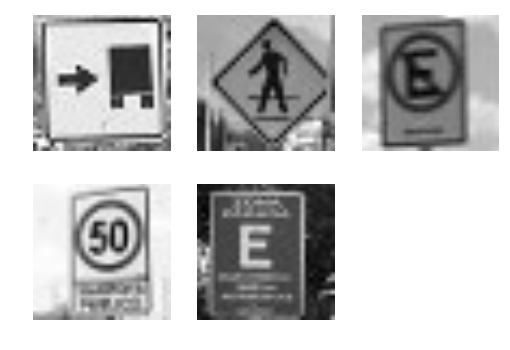

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
base_name = "traffic_ec_"

new_images = []
fig = plt.figure()

for i in range(1, 6):
    name = base_name + str(i) + ".jpg"
    img = cv2.imread(name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    
    img = normalize(img)
    
    a = fig.add_subplot(2,3,i)
    plt.axis("off")
    plt.imshow(img, cmap="gray")
    
    img = np.expand_dims(img, axis=2) # make dimensions 32x32x1, not 32x32
    new_images.append(img)

plt.show()
new_signs = np.array(new_images, dtype=float)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The images of the signs are clear enough. One aspect that may create problems is the perspective in a couple of them. However, since the classifier was trained using images with different distortions (blurry, poor lighting, different perspectives), and I even created images with transformations (blur, translation, and rotation), I am sure that the model can do a good job.

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
save_file = 'train_model3.meta'
with tf.Session() as sess:
    saver = tf.train.import_meta_graph(save_file)
    saver.restore(sess, tf.train.latest_checkpoint('./'))
    new_predictions_f = tf.argmax(logits, 1)
    new_predictions = sess.run(new_predictions_f, feed_dict={x: new_images})
    print("Predictios for unseen images: " + str(new_predictions))  

Predictios for unseen images: [20 25  2  9 17]


In [19]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.924


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

Next, the meaning of the signs I used, and the description of the labels assigned by the model:

  * Sign 1: Heavy vehicles in the right lane. Dangerous curve to the right.
  * Sign 2: Pedestrians. Road work.
  * Sign 3: Do not park. Speed limit (50km/h).
  * Sign 4: Speed limit (50km/h). No passing.
  * Sign 5: Parking information. No entry.

The accuracy for the test set is 0.924

0% of accuracy in the captured images. Looks like the model is not doing any well. Analyzing the data, I can find the following possible reasons:

  * Labels of images: Just 2 out of the 5 signs can be labeled with one of the 43 classes present in the data set. So, the best accuracy that can be achieved with the new images is 40%. Solution: Use images that can be labeled with any of the 43 classes.
  * Number of images: The model was trained with 32773 images, validated with 11763, and tested with 12630. Here, I am comparing the performance of two unrelated sets when it comes to their sizes (12630 vs 5). Solution: Use a set with a size similar to the test set.
  
In the case of the test set, the accuracy is 92.4%. In this case the model did better. I can conclude the following:

  * As stated previously, using more images can give better results. More images not necessarily means that the results are reliable. The accuracy can be misleading if the data is unbalanced. A model can predict very good for a class or few classes (those with many samples) and very bad for the rest (those with few samples). In the current model, I balanced the data for the training set, but I did not balanced the data in the validation and testing sets. So, the results can be better (more reliable) when using balanced data in all sets.
  * Besides the issues that come with unbalanced data, 92.4% is a good accuracy for a classifier model. However, it is still far from the results of other models that are able to classify traffic sign images even better than humans. The performance of this kind of models is specially important in the field of self-driving cars where a single mistake can be fatal.

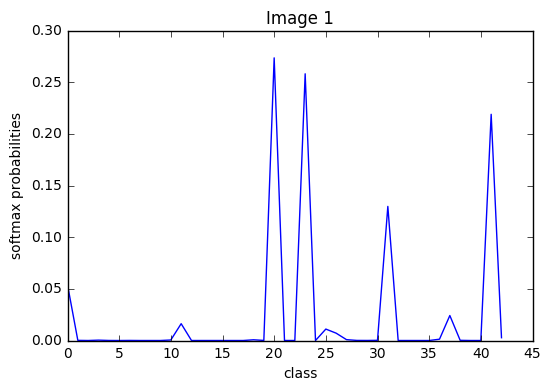

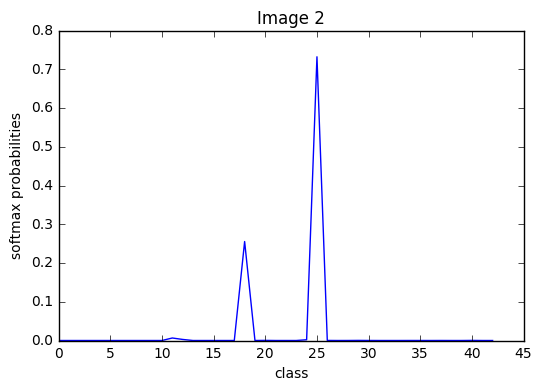

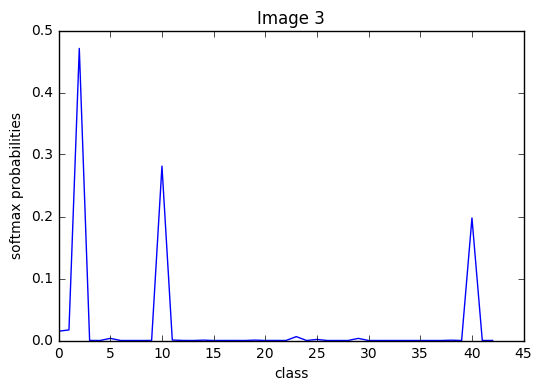

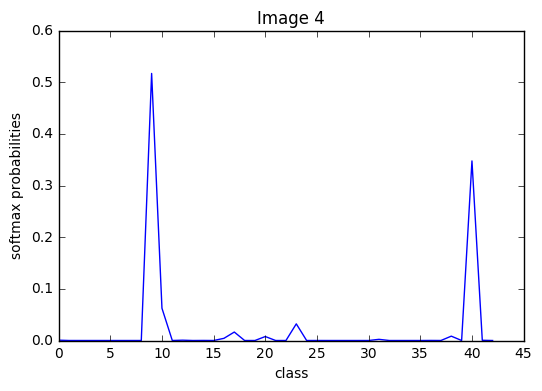

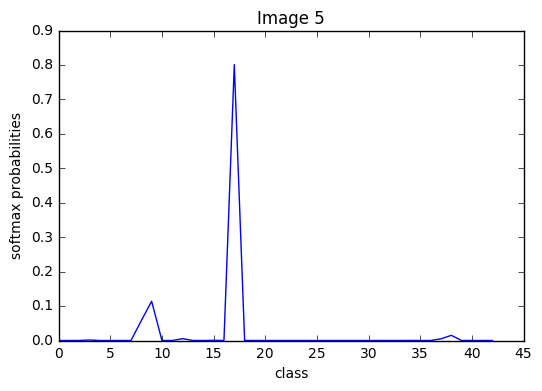

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.softmax(logits), feed_dict={x: new_signs})
    i = 1
    for res in results:
        plt.plot(res)
        plt.xlabel("class")
        plt.ylabel("softmax probabilities")
        plt.title("Image " + str(i))
        i += 1
        plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    #results = sess.run(tf.nn.top_k(tf.nn.l2_normalize(logits,0),5), feed_dict={x: new_signs})
    results = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: new_signs})
    print(results.values)
    print(results.indices)

[[ 0.27351922  0.25809672  0.21889453  0.12976602  0.05401538]
 [ 0.73216712  0.2553921   0.00644633  0.00275675  0.00194733]
 [ 0.47111413  0.28130811  0.19769634  0.01706514  0.01497185]
 [ 0.516886    0.34756351  0.06244005  0.03219688  0.01635614]
 [ 0.80078441  0.11398077  0.05750294  0.01495671  0.00529893]]
[[20 23 41 31  0]
 [25 18 11 12 24]
 [ 2 10 40  1  0]
 [ 9 40 10 23 17]
 [17  9  8 38 12]]


**Answer:**
Based on the softmax probabilities, the model is very certain of the predictions of two out of five traffic signs (images #2 and #5) because the values of the highest probabilities are far from the rest (they are very prominent).

In the case of the two images (#2 and #4) that can be labeled with one of the 43 classes, the correct label does not appear among the 5 with the highest probabilities.

The model did not perform well in new images. Also, it was very certain of its predictions in a couple of images. Given that the number of images is small, and just two of them could be labeled with one of the 43 labels, there is no a definitive conclusion about the behaviour of the model under these conditions.

However, I can say that if a model has a high confidence to classify an element that has no corresponding label (image #5), then that sign presents a lot of features similar to the images used to train the model with that label.

The opposite occurs, In the case of the model not being very certain about the prediction of an image. In the current exercise, I can conclude that the images with low certain in their predictions have features that are common with a several classes.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.